# **Bitcoin Price Prediction**

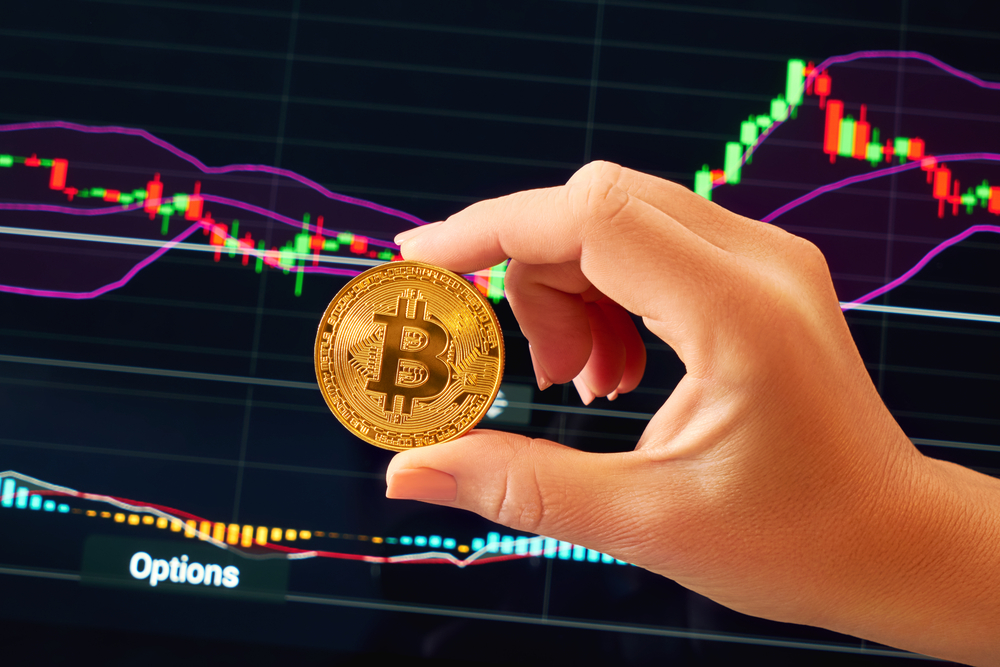

### **INTRODUCTION**

Bitcoin is one of the most volatile digital assets in the world, with price fluctuations that can be quite unpredictable. As the adoption of cryptocurrencies grows, the need for robust models to forecast their prices becomes more critical for investors, traders, and financial analysts. Bitcoin’s price prediction is a complex task due to the numerous factors that influence its market movements, including historical price data, market sentiment, macroeconomic conditions, and news events.

In this project, a Long Short-Term Memory (LSTM) model is utilized to predict the future price of Bitcoin based on historical price data. By leveraging past data, the model aims to provide accurate forecasts that could help investors make informed decisions, such as when to buy, sell, or hold Bitcoin. The project will focus on utilizing time series data and exploring the potential of machine learning to predict the future prices of Bitcoin.

### **AIM**

This project aims to develop an effective machine learning model to forecast Bitcoin prices based on historical data, focusing on accuracy and real-time decision-making capabilities. The goal is to develop a model that not only predicts future Bitcoin prices but also provides recommendations on whether to buy, sell, or hold, helping investors and traders make better-informed decisions and an interactive dashboad none complex use

**OBJECTIVES**

To develop and evaluate a machine learning model that accurately predicts Bitcoin prices, using metrics like Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R²), with the final product being a predictive model and a visualization dashboard to aid in making informed trading decisions

#### **Importing Packages**

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.cm as cm

# Suppress all warnings
warnings.filterwarnings('ignore')

#### **Data Loading**

The dataset used in this project was sourced from Kaggle and provides historical data on Bitcoin's price performance from 2010 until March 9, 2025. The data includes key metrics such as daily opening, closing, high, and low prices, as well as other features that help in understanding Bitcoin's market behavior over time. This dataset will serve as the foundation for building a predictive model to forecast Bitcoin's price movements and offer investment recommendations.

In [2]:
Bitcoin_df = pd.read_csv('/content/BTC.csv')

In [3]:
Bitcoin_df.head(5)

,ticker,date,open,high,low,close
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921


#### **Data Cleaning and Manipulation**

In [18]:
Bitcoin_df.shape

(5302, 10)

In [5]:
import pandas as pd

# Convert the 'date' column to datetime format
Bitcoin_df['date'] = pd.to_datetime(Bitcoin_df['date'])

# Check the data type again
print(Bitcoin_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5302 entries, 0 to 5301
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ticker  5302 non-null   object        
 1   date    5302 non-null   datetime64[ns]
 2   open    5302 non-null   float64       
 3   high    5302 non-null   float64       
 4   low     5302 non-null   float64       
 5   close   5302 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 248.7+ KB
None


In [6]:
import pandas as pd

# Extract month, day,year and hour from 'date'
Bitcoin_df['month'] = Bitcoin_df['date'].dt.month
Bitcoin_df['year'] = Bitcoin_df['date'].dt.year
Bitcoin_df['day_of_week'] = Bitcoin_df['date'].dt.dayofweek  # 0=Monday, 1=Tuesday, ..., 6=Sunday


# Display the DataFrame with new features
print(Bitcoin_df.head())


  ticker       date     open     high      low    close  month  year  \
0    BTC 2010-07-17  0.04951  0.04951  0.04951  0.04951      7  2010   
1    BTC 2010-07-18  0.04951  0.08585  0.04951  0.08584      7  2010   
2    BTC 2010-07-19  0.08584  0.09307  0.07723  0.08080      7  2010   
3    BTC 2010-07-20  0.08080  0.08181  0.07426  0.07474      7  2010   
4    BTC 2010-07-21  0.07474  0.07921  0.06634  0.07921      7  2010   

   day_of_week  
0            5  
1            6  
2            0  
3            1  
4            2  


In [17]:
print(Bitcoin_df.isnull().sum())

ticker          0
date            0
open            0
high            0
low             0
close           0
month           0
year            0
day_of_week     0
Daily_Change    0
dtype: int64


In [15]:
# Fill missing 'Daily_Change' values with the median
Bitcoin_df["Daily_Change"].fillna(Bitcoin_df["Daily_Change"].median(), inplace=True)



In [16]:
Bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5302 entries, 0 to 5301
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ticker        5302 non-null   object        
 1   date          5302 non-null   datetime64[ns]
 2   open          5302 non-null   float64       
 3   high          5302 non-null   float64       
 4   low           5302 non-null   float64       
 5   close         5302 non-null   float64       
 6   month         5302 non-null   int32         
 7   year          5302 non-null   int32         
 8   day_of_week   5302 non-null   int32         
 9   Daily_Change  5302 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int32(3), object(1)
memory usage: 352.2+ KB


In [9]:
Bitcoin_df.duplicated().sum()

0

In [10]:
Bitcoin_df.describe()


,date,open,high,low,close,month,year,day_of_week
count,5302,5302.000000,5302.000000,5302.000000,5302.000000,5302.000000,5302.000000,5302.000000
mean,2017-10-18 21:07:32.206714368,14249.283367,14585.483472,13890.149579,14263.488435,6.566390,2017.295172,3.000377
min,2010-07-17 00:00:00,0.049510,0.049510,0.010000,0.049510,1.000000,2010.000000,0.000000
25%,2014-03-03 06:00:00,236.575000,240.555000,232.430000,236.710000,4.000000,2014.000000,1.000000
50%,2017-10-18 12:00:00,3791.090000,3893.510000,3645.915000,3798.270000,7.000000,2017.000000,3.000000
75%,2021-06-04 18:00:00,21134.050000,21663.775000,20646.625000,21169.550000,10.000000,2021.000000,5.000000
max,2025-03-09 00:00:00,105118.000000,106426.000000,103320.000000,105104.000000,12.000000,2025.000000,6.000000
std,NaN,21110.215888,21575.476323,20606.005584,21123.727279,3.451667,4.206046,2.000660


In [34]:
Bitcoin_df.to_csv('cleaned_bitcoin_data.csv', index=False)


#### **Exploratory Data Analysis**

**1️⃣ Bitcoin Price Trends & Volatility**

**Q1: How has Bitcoin price evolved over time?**

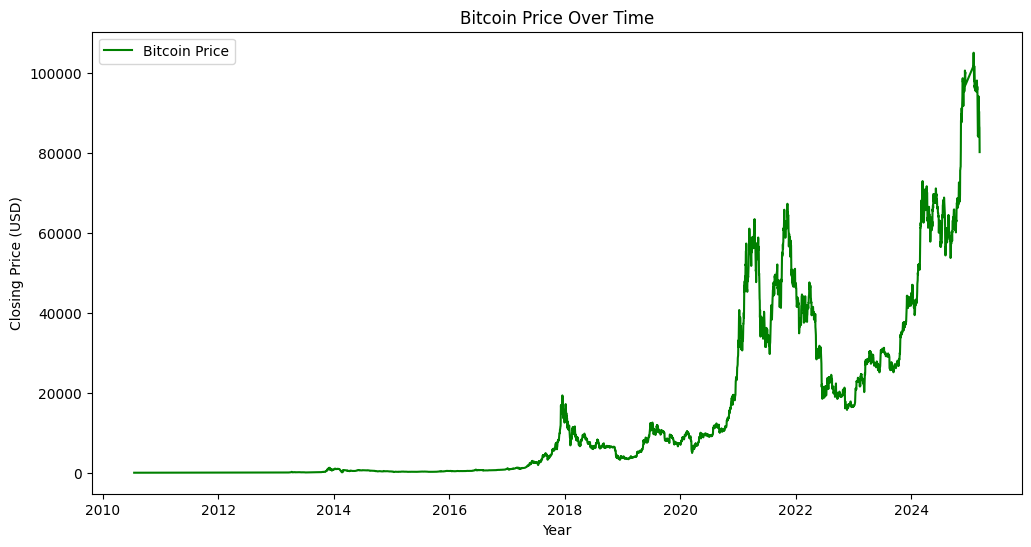

In [25]:
plt.figure(figsize=(12,6))
plt.plot(Bitcoin_df["date"], Bitcoin_df["close"], label="Bitcoin Price", color="green")
plt.xlabel("Year")
plt.ylabel("Closing Price (USD)")
plt.title("Bitcoin Price Over Time")
plt.legend()
plt.show()

**Key Observations:**

* **Early Years (2010-2016)**: The price of Bitcoin remained relatively low and stable, fluctuating below $20,000.

* **Significant Growth (2017)**: A sharp increase in price is observed around 2017, reaching a peak close to $20,000.

* **Volatility (2018-2020)**: The price experiences significant volatility, with sharp rises and falls.

* **Major Run (2020-2022)**: A substantial bull run starts in late 2020, peaking at over 60,000 in 2021 and then again around 2022, reaching a high of over $60,000.

* **Recent Trends** (2022-2024): The price continues to fluctuate but shows an overall upward trend, reaching above $100,000 by 2024.

**Concise Bitcoin Risk Management**

* **Long-Term View**: The graph shows overall upward trend, but expect volatility.
* **Prepare for Drops**: Significant price drops follow peaks; use stop-loss orders.
* **Avoid Peak Buying**: Dollar-cost averaging reduces risk from timing the market.
* **Volatility is Increasing**: Manage risk with diversification and orders.
* **No Guarantees**: Past trends don't ensure future results.

**Q2: What were the highest and lowest Bitcoin prices recorded?**

In [26]:
highest_price = Bitcoin_df["high"].max()
lowest_price = Bitcoin_df["low"].min()
print(f"Highest Bitcoin Price: ${highest_price}")
print(f"Lowest Bitcoin Price: ${lowest_price}")

Highest Bitcoin Price: $106426.0
Lowest Bitcoin Price: $0.01


**key observations**

**1. Bitcoin's Price Extremes**

* The highest recorded Bitcoin price in the dataset is $106426.0, while the lowest recorded price is 0.01 dollars.

* This reflects Bitcoin’s dramatic price growth over time, from being almost worthless to reaching six-figure values.

**2. Significant Price Fluctuations**

* The extreme difference between the highest and lowest prices suggests high volatility in Bitcoin's price movements.
* Major factors like market adoption, investor sentiment, and regulatory changes likely influenced these shifts.

**3. Historical Growth and Trends**

* Bitcoin's price has increased exponentially over the years, experiencing bull runs and corrections along the way.

**Q3: Most Volatile Periods in Bitcoin History**

In [11]:
# Calculate Daily Price Change Percentage and store it as a column
Bitcoin_df["Daily_Change"] = Bitcoin_df["close"].pct_change() * 100

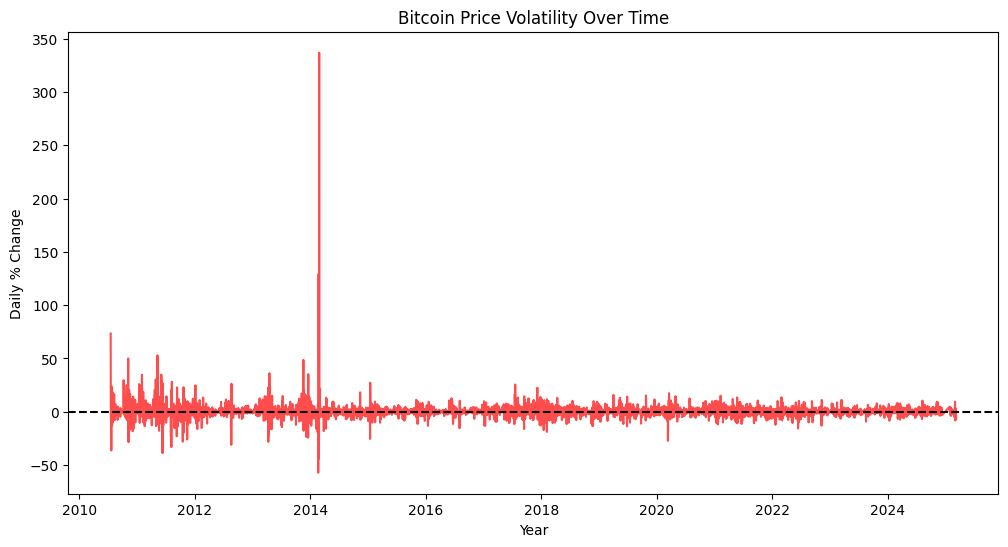

In [12]:
plt.figure(figsize=(12,6))
plt.plot(Bitcoin_df["date"],Bitcoin_df["Daily_Change"], color="red", alpha=0.7)
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Year")
plt.ylabel("Daily % Change")
plt.title("Bitcoin Price Volatility Over Time")
plt.show()

**Key Findings**

**1. High Volatility**: The graph clearly shows that Bitcoin's price is highly volatile. There are numerous spikes and dips, indicating significant daily percentage changes. This underscores the need for robust risk management strategies.

**2.Early Years (2010-2014) Show Extreme Volatility**: The graph reveals that Bitcoin's early years were marked by particularly high volatility. There's a dramatic spike in 2014, showing an extremely large daily percentage change. This highlights the speculative nature of Bitcoin in its nascent stages.

**3. Volatility Persists, but with Variations**: While the extreme spikes seen in the early years are less frequent in later periods, the graph still shows significant volatility throughout the entire timeframe. This suggests that even as Bitcoin matures, it remains a volatile asset.

**4. Periods of Relative Stability**: There are periods where the daily percentage changes are relatively small, indicating lower volatility. However, these periods are interspersed with spikes, reminding investors that volatility can return quickly.

**Risk Managment Strategies**

* **Diversification**: Allocate investments across different asset classes to reduce overall portfolio risk.
* **Dollar-Cost Averaging**: Invest consistently over time to mitigate the impact of price fluctuations.
* **Stop-Loss Orders**: Utilize stop-loss orders to limit potential losses by automatically selling Bitcoin if the price falls below a predetermined level.
* **Position Sizing**: Carefully manage position sizes to control risk exposure.
* **Continuous Monitoring**: Stay informed about market trends and news that could impact Bitcoin's price.

**2️⃣ Seasonality & Patterns**

**Q4: Does Bitcoin price exhibit seasonal trends?**

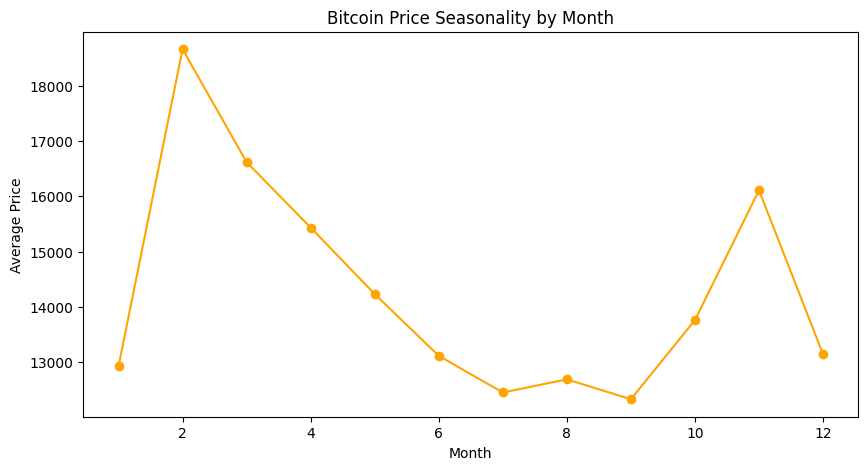

In [29]:
monthly_avg_price = Bitcoin_df.groupby("month")["close"].mean()

plt.figure(figsize=(10,5))
plt.plot(monthly_avg_price.index, monthly_avg_price.values, marker="o", color="orange")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.title("Bitcoin Price Seasonality by Month")
plt.show()

**Key Observations**

* **Peak in February**: The highest average price is observed in February (month 2), suggesting a potential seasonal high during this month.
* **Low in September**: The lowest average price is seen in September (month 9), indicating a potential seasonal low.
* **General Trend**: There appears to be a general upward trend from January to February, followed by a decline to September, and then another rise towards the end of the year, peaking again in November.
* **Potential Seasonality**: The graph suggests that Bitcoin's price might exhibit some degree of seasonality, with certain months tending to have higher or lower average prices.

**Important Considerations:**

* **Average Price**: The graph shows average prices, which means there can still be significant fluctuations within each month.
* **Limited Data**: Seasonality patterns can change over time and may not be consistent every year. This graph represents a specific dataset and might not be representative of all historical data.
* **External Factors**: Many factors can influence Bitcoin's price, including market sentiment, regulatory changes, and macroeconomic conditions. Seasonality may be one factor among many.

**Implications for Investors:**

* **Potential Trading Opportunities**: Investors might try to capitalize on perceived seasonal patterns by buying in months with historically lower prices and selling in months with historically higher prices. However, this strategy is speculative and carries risk.
* **Risk Management**: Understanding potential seasonal trends can help investors manage risk by being aware of periods when prices might be more volatile.

**Q5: Do certain days of the week have more price movements?**

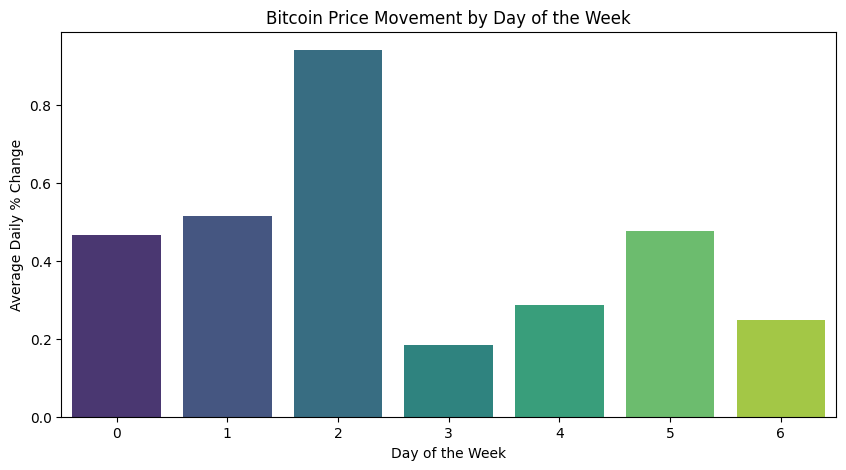

In [93]:
daily_changes_by_day = Bitcoin_df.groupby("day_of_week")["Daily_Change"].mean()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=daily_changes_by_day.index, y=daily_changes_by_day.values, palette="viridis")
plt.xlabel("Day of the Week")
plt.ylabel("Average Daily % Change")
plt.title("Bitcoin Price Movement by Day of the Week")
plt.show()

**Key Observations**

* **Highest Average Change on Tuesday**: The tallest bar is on Day 2 (Tuesday), indicating the highest average daily percentage change in Bitcoin's price. This suggests that Bitcoin tends to experience the most significant price movement on Tuesdays.

* **Lowest Average Change on Wednesday**: The shortest bar is on Day 3 (Wednesday), indicating the lowest average daily percentage change. This suggests that Bitcoin tends to experience the least price movement on Wednesdays.

* **Potential Weekend Effect**: It's interesting to note that the average changes on the weekend (Sunday and Saturday) appear to be relatively lower compared to some weekdays. This might suggest a "weekend effect" where trading activity and price volatility are reduced.

With this specific day information, investors who believe in these
weekly patterns might consider:

* **Increased Caution on Tuesdays**: Being more cautious with trades on Tuesdays due to the higher potential for volatility.
* **Potential Buying Opportunities on Wednesdays**: Exploring potential buying opportunities on Wednesdays if they anticipate prices to be relatively stable.

**4️⃣ Extreme Events & Anomalies**

**Q6: Were there sudden crashes or price spikes?**

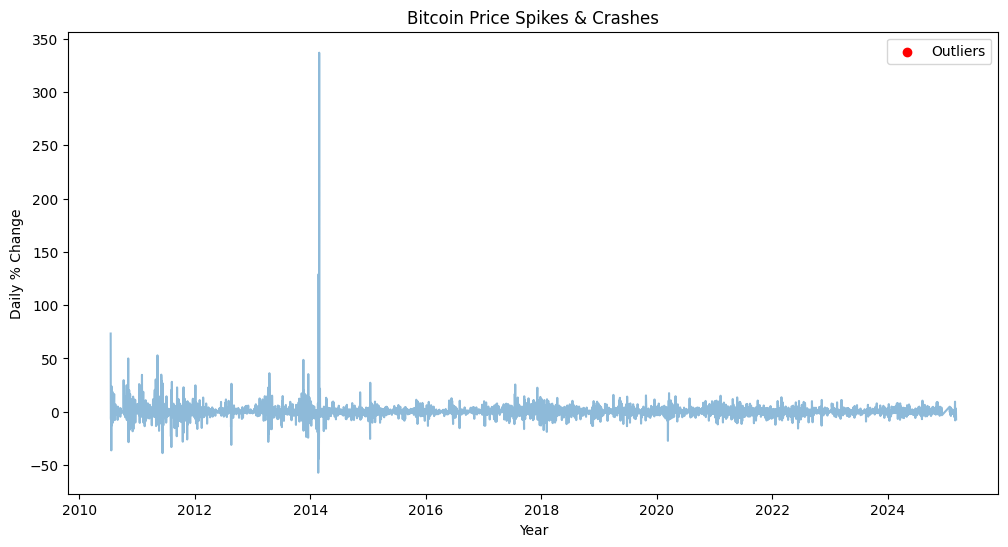

In [95]:
from scipy.stats import zscore

# Calculate Z-Score without adding it to the DataFrame
Z_Score = zscore(Bitcoin_df["Daily_Change"])

# Identify outliers where the absolute Z-Score is greater than 3 (or another threshold you set)
outliers = Bitcoin_df[abs(Z_Score) > 3]

# Plot outliers
plt.figure(figsize=(12,6))
plt.scatter(outliers["date"], outliers["Daily_Change"], color="red", label="Outliers")
plt.plot(Bitcoin_df["date"], Bitcoin_df["Daily_Change"], alpha=0.5)
plt.xlabel("Year")
plt.ylabel("Daily % Change")
plt.title("Bitcoin Price Spikes & Crashes")
plt.legend()
plt.show()


**Key Observations**

* **Visual Emphasis on Volatility**: The graph effectively highlights the volatile nature of Bitcoin's price history. The numerous spikes and dips along the light blue line indicate frequent and often substantial daily percentage changes.
* **Identification of Outliers**: The red markers draw attention to the most extreme price movements, making it easy to see when Bitcoin experienced its most significant spikes or crashes.
* **Early Volatility**: The graph suggests that Bitcoin's early years (around 2013-2014) were particularly volatile, with several notable outliers.
* **Volatility Persists**: While the frequency of extreme outliers may decrease over time, the graph shows that Bitcoin's price continues to experience significant fluctuations throughout its history.


**Implications for Investors:**

* **High Risk, High Reward**: The graph underscores the high-risk, high-reward nature of Bitcoin investments. The potential for significant gains is accompanied by the risk of substantial losses.
* **Importance of Risk Management**: The graph reinforces the need for robust risk management strategies, such as diversification, dollar-cost averaging, and stop-loss orders.
* **Potential for Trading Opportunities**: The identification of outliers might be of interest to traders looking to capitalize on extreme price movements. However, this strategy is highly speculative and carries significant risk.
* **Long-Term Perspective**: The graph suggests that while Bitcoin's price can be volatile in the short term, the long-term trend has generally been upward. Investors with a long-term perspective may be more willing to tolerate short-term volatility.


**Q7: Top 5 Biggest Single-Day Gains & Losses**

In [59]:
top_gains = Bitcoin_df.nlargest(5, "Daily_Change")[["date", "Daily_Change"]]
top_losses = Bitcoin_df.nsmallest(5, "Daily_Change")[["date", "Daily_Change"]]

print("Top 5 Biggest Gains:")
print(top_gains)
print("\nTop 5 Biggest Losses:")
print(top_losses)

Top 5 Biggest Gains:
           date  Daily_Change
1320 2014-02-26    336.839004
1316 2014-02-22    129.105414
1    2010-07-18     73.379115
297  2011-05-10     52.894737
112  2010-11-06     50.000000

Top 5 Biggest Losses:
           date  Daily_Change
1314 2014-02-20    -57.205674
1318 2014-02-24    -43.901731
329  2011-06-11    -38.830898
5    2010-07-22    -36.245424
385  2011-08-06    -33.163265


**Key Observations**:

* **Extreme Volatility in Early Years**: Both the biggest gains and losses occurred in 2010, 2011, and 2014. This confirms the observation from the graphs that Bitcoin's early years were marked by extreme volatility.
* **Magnitude of Changes**: The percentage changes are substantial, with gains exceeding 300% in a single day and losses reaching over 50%. This highlights the potential for both extraordinary gains and devastating losses in the Bitcoin market.
* **February 2014 Stands Out**: February 2014 appears to have been a particularly volatile period, with both the largest gain (336.84% on February 26th) and a significant loss (-57.21% on February 20th) occurring within that month.

**Implications for Investors:**

* **Risk Awareness**: This data reinforces the critical importance of risk awareness when investing in Bitcoin. Even with the potential for large gains, the possibility of significant losses in a short period cannot be ignored.
* **Early Years vs. Maturity**: While Bitcoin has matured as an asset, it's essential to remember that extreme volatility can still occur. Investors should not assume that past patterns of extreme fluctuations are entirely a thing of the past.
* **Emotional Resilience**: Investing in Bitcoin requires emotional resilience to withstand the significant price swings. Panic selling during a downturn can lead to substantial losses, while chasing gains during a peak can also be risky.

**Connecting to the Graphs:**

This data complements the insights gained from the graphs:

* **"Bitcoin Price Over Time"** and **"Bitcoin Price Volatility Over Time"**: The data points to specific dates of extreme price swings, adding detail to the broader trends shown in these graphs.
* **"Bitcoin Price Spikes & Crashes"**: The dates in this data likely correspond to some of the red outlier markers in this graph, providing concrete examples of those extreme movements.

**Comparisons & Correlations**

**Q8: Correlation Between Open, High, Low, Close Prices**

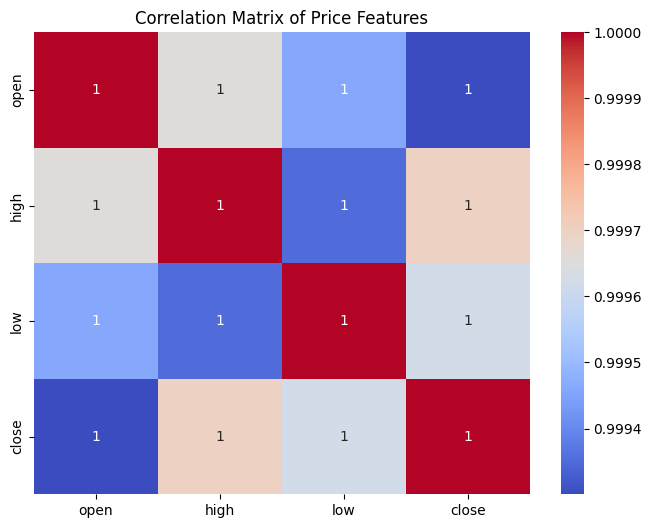

In [96]:
plt.figure(figsize=(8,6))
sns.heatmap(Bitcoin_df[["open", "high", "low", "close"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Price Features")
plt.show()

**Key Observations**

* **Perfect Positive Correlation**: All cells in the matrix show a correlation coefficient of 1.0000 (or very close to it). This indicates a perfect positive correlation between all pairs of variables.
* **Meaning of Perfect Correlation**: A perfect positive correlation means that as one variable increases, the other variable increases proportionally, and vice versa. In this context, it implies that the "open," "high," "low," and "close" prices of Bitcoin move in perfect unison.
* **Red Color**: All cells are colored red, visually representing the strong positive correlation.
* **Diagonal is Always 1**: The diagonal cells (where a variable is correlated with itself) always have a correlation of 1, as a variable is perfectly correlated with itself.

**Implications:**

* **Redundancy**: This heatmap suggests that the "open," "high," "low," and "close" prices of Bitcoin are highly redundant. Knowing one value essentially tells you the other values.
* **Feature Selection**: When building a model to predict Bitcoin's price, consider removing some of these features since they provide very little unique information.
* **Market Efficiency**: The perfect correlation suggests a high degree of market efficiency, as prices adjust rapidly to new information.